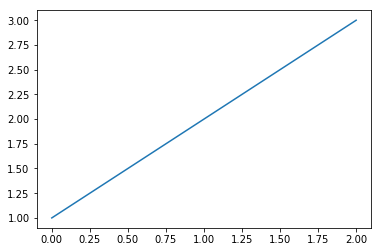

In [48]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
plt.plot([1,2,3])
plt.show()

In [50]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
tabla_mortalidad = pd.read_csv("mortalidad.csv")
tabla_mortalidad.index = range(15,100)

class Persona:
    def __init__(self, edad):
        vivos = list(tabla_mortalidad.lx)
        muertos = list(tabla_mortalidad.dx)
        proba_morir = list(tabla_mortalidad.px)
        proba_vivir = list(tabla_mortalidad.qx)
        Dx = list(tabla_mortalidad.Dx)
        Nx = list(tabla_mortalidad.Nx)
        Cx = list(tabla_mortalidad.Cx)
        Mx = list(tabla_mortalidad.Mx)
        self.lx = vivos[edad-15]
        self.dx = muertos[edad-15]
        self.px = proba_morir[edad-15]
        self.qx = proba_vivir[edad-15]
        self.Dx = Dx[edad-15]
        self.Nx = Nx[edad-15]
        self.Cx = Cx[edad-15]
        self.Mx = Mx[edad-15]
        if edad < 14:
            error = f"Edad fuera de los parámetros."
            raise IndexError(error)
        elif edad > 99:
            error2 = f"Edad fuera de los parámetros."
            raise IndexError(error2)
        else:
            print(f"Bienvenido.")
            
    def datos_tabla(self, nuev_dato):
        nuev_dato = nuev_dato.lower()
        if nuev_dato == "lx":
            return self.lx
        elif nuev_dato == "dx":
            return self.dx
        elif nuev_dato == "px":
            return self.px
        elif nuev_dato == "qx":
            return self.qx
        else:
            raise KeyError("Ingrese un dato válido.")
            
    def cálculo_de_primas(self, tipo_seguro, tiempo, suma_asegurada): ##Terminar seguro temporal y dotal
        seguro = tipo_seguro.lower()
        if seguro == "ordinario":
            ordi = float(self.Mx.replace("$","").replace(",",""))
            nario = float(self.Dx.replace("$","").replace(",",""))
            sord = (ordi/nario)*suma_asegurada
            return f"La prima pura única será de: ${sord}"
        elif seguro == "temporal": ##¿Cómo se puede modificar desde aquí "self.Mx"?
            tem = float(self.Mx.replace("$","").replace(",",""))
            tiempo1 = self.Mx[tiempo1-15]
            po = float(tiempo1.replace("$","").replace(",",""))
            return po
    
    def gráficas(self, relación1, relación2):
        return f"Checar"

In [20]:
Victor = Persona(15)

Bienvenido.


In [21]:
Victor.cálculo_de_primas("Ordinario",0,7500000)

'La prima pura única será de: $885935.7295794222'

In [5]:
tabla_mortalidad

,Edad,lx,dx,px,qx,Dx,Nx,Cx,Mx
15,15,"10,000,000","17,810",0.001781,0.998219,"$5,167,204.40","$105,819,721.60","$8,806.50","$610,374.80"
16,16,"9,982,190","17,958",0.001799,0.998201,"$4,935,886.70","$100,652,517.20","$8,497.30","$601,568.30"
17,17,"9,964,232","18,125",0.001819,0.998181,"$4,714,839.30","$95,716,630.40","$8,207.00","$593,071.00"
18,18,"9,946,107","18,311",0.001841,0.998159,"$4,503,600.90","$91,001,791.20","$7,934.20","$584,864.00"
19,19,"9,927,796","18,525",0.001866,0.998134,"$4,301,731.80","$86,498,190.20","$7,681.30","$576,929.80"
20,20,"9,909,271","18,758",0.001893,0.998107,"$4,108,808.50","$82,196,458.50","$7,442.90","$569,248.60"
21,21,"9,890,513","19,019",0.001923,0.998077,"$3,924,431.20","$78,087,650.00","$7,221.50","$561,805.60"
22,22,"9,871,494","19,319",0.001957,0.998043,"$3,748,215.00","$74,163,218.80","$7,019.60","$554,584.10"
23,23,"9,852,175","19,645",0.001994,0.998006,"$3,579,789.10","$70,415,003.80","$6,830.60","$547,564.60"
24,24,"9,832,530","20,009",0.002035,0.997965,"$3,418,804.80","$66,835,214.70","$6,657.60","$540,733.90"
